<div style="background-color: #8e7cc3; padding: 7px; text-align: center;">
    <h2>Projeto Estatística I | Análise Exploratória de Dados (EDA) em Python</h2>
</div>

**Motivação:** Gostaríamos de entender como a preparação prévia dos alunos se relaciona às notas alcançadas em testes de conhecimento em matemática, escrita e leitura.

**Hipótese:** Estudantes que completaram o curso de preparação para o teste têm notas maiores.

**``H0 (hipótese nula):``** A média das notas totais dos testes é igual para alunos que completaram e não completaram o curso.

*média notas com preparação = média notas sem preparação*

**``H1 (hipótese alternativa):``** A média das notas totais dos testes é diferente para alunos que completaram e não completaram o curso.

*média notas com preparação <> média notas sem preparação*

**Dados:**

``study_performance.csv``

| Colunas                     | Descrição                                      | Dtype  | Classificação        |
|-----------------------------|------------------------------------------------|--------|----------------------| 
| gender                      | Gênero do aluno                                | object | Qualitativa Nominal  |
| race_ethnicity              | Grupo étnico do aluno                          | object | Qualitativa Nominal  | 
| parental_level_of_education | Último nível de educação dos pais              | object | Qualitativa Ordinal  |
| lunch                       | Almoço antes do teste                          | object | Qualitativa Nominal  |
| test_preparation_course     | Finalização do curso preparatório para o teste | object | Qualitativa Nominal  |
| math_score                  | Nota em matemática                             | int64  | Quantitativa Discreta|
| reading_score               | Nota em leitura                                | int64  | Quantitativa Discreta|
| writing_score               | Nota em escrita                                | int64  | Quantitativa Discreta|

# Importando Bibliotecas e Módulos

In [158]:
# Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Módulos
import funcoes_graficos as fns 

# Carregando Dados

In [159]:
URL = 'https://raw.githubusercontent.com/tainahguerras/Estatistica-ADA-Santander/main/data/study_performance.csv?token=GHSAT0AAAAAACPQTJF2RXJM7QLNQAEEFDSKZQMSP6A'
data = pd.read_csv(URL)

# Exploração Inicial

In [160]:
print('Forma do dataset:',data.shape)

Forma do dataset: (1000, 8)


In [161]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checando valores faltantes

In [163]:
data.isnull().sum() 

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Checando registros duplicados

In [164]:
data.duplicated().sum() 

0

### Proporção das Variáveis Categóricas

In [165]:
vars_cat = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

print('Proporção das categorias, em %:\n')

for var in vars_cat:
    print(data[var].value_counts(True)*100, '\n')

Proporção das categorias, em %:

gender
female    51.8
male      48.2
Name: proportion, dtype: float64 

race_ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64 

parental_level_of_education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64 

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64 

test_preparation_course
none         64.2
completed    35.8
Name: proportion, dtype: float64 



In [168]:
data['score_sum'] = data['math_score'] + data['reading_score'] + data['writing_score']

In [179]:
def create_histogram(data, title = '', xlabel = '', ylabel = '', size = (8,4)):
    
    ax = sns.histplot(x=data, bins=20, kde=True, color='#8e7cc3')

    ax.figure.set_size_inches(size)
    ax.set_title(title , fontsize=12)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax

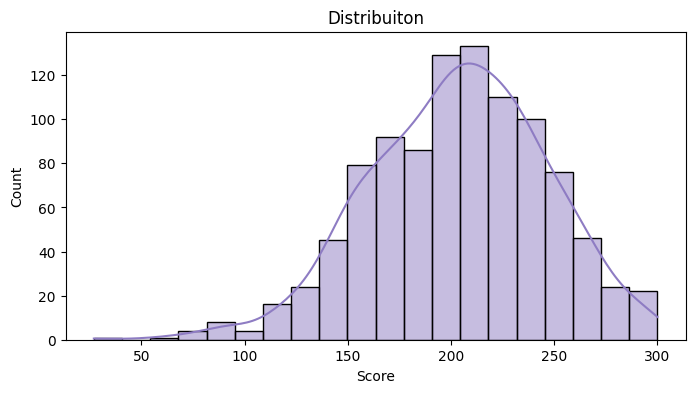

In [180]:
create_histogram(data=data['score_sum'], title = 'Distribuiton', xlabel = 'Score', ylabel = 'Count')

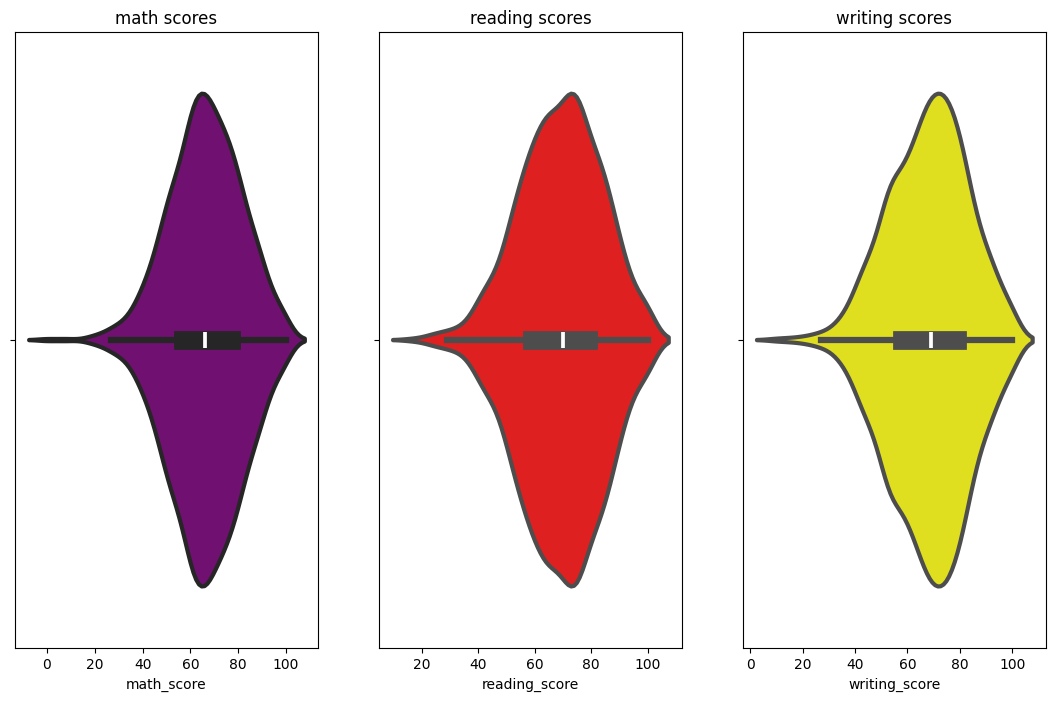

In [184]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('math scores')
sns.violinplot(x='math_score',data=data,color='purple',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('reading scores')
sns.violinplot(x='reading_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('writing scores')
sns.violinplot(x='writing_score',data=data,color='yellow',linewidth=3)
plt.show()

In [170]:
def plot_violin_boxplot(dados, titulo, xlabel, ylabel, cor='#8e7cc3'):

    fig, axs = plt.subplots(1, 2, figsize=(12, 8))

    sns.boxplot(x=dados, color=cor, ax=axs[0])
    axs[0].set_title(titulo)
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)

    sns.violinplot(x=dados,color=cor,linewidth=3)
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()

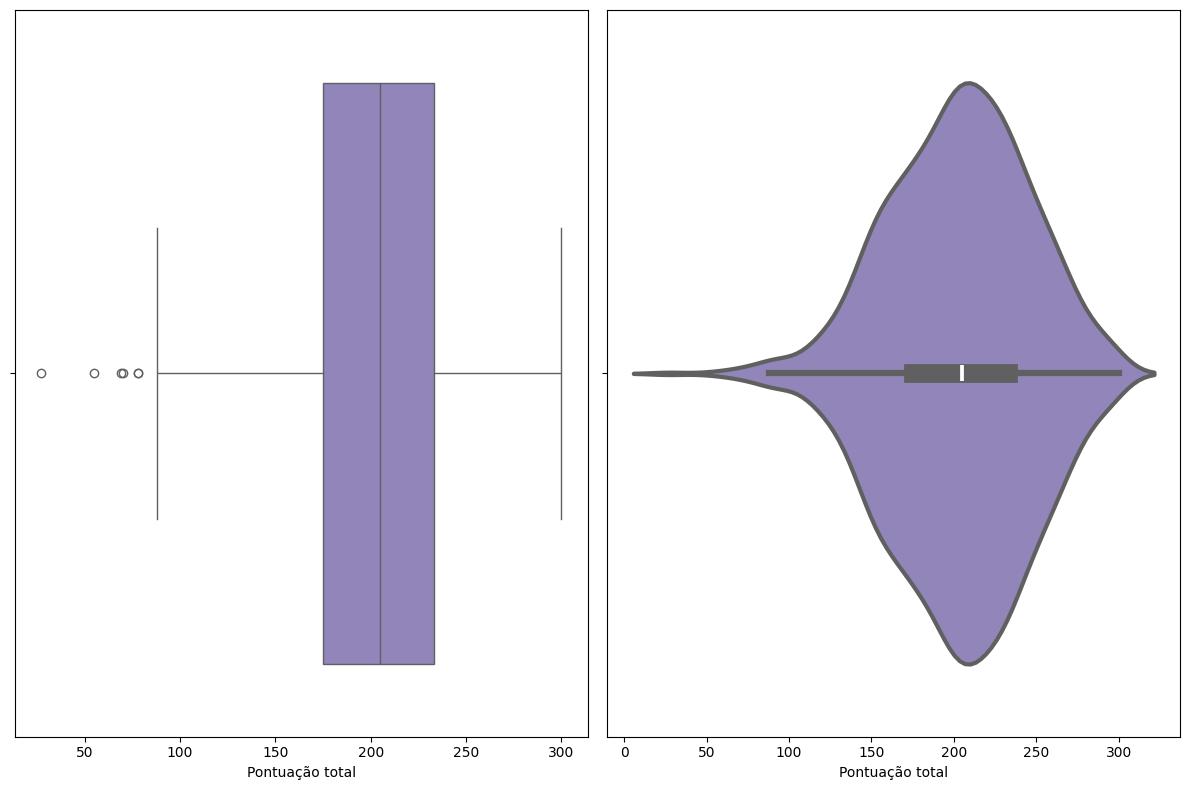

In [181]:
plot_violin_boxplot(dados=data['score_sum'], titulo='', xlabel='Pontuação total', ylabel='')

Tentar entender outliers? O que fazer com eles?

## Análise Hipótese

In [ ]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score_sum
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [171]:
from scipy import stats

In [172]:
normal_test = stats.normaltest(data['score_sum'])
pvalue = normal_test.pvalue
print(f"p-value: {pvalue}")
if pvalue <= 0.05:
    print('Rejeitamos H0; não é normal')
else:
    print('Aceitamos H0; é normal')

p-value: 0.0005037851534493755
Rejeitamos H0; não é normal


In [183]:
data['test_preparation_course'] = data['test_preparation_course'].replace(['none', 'completed'], [0, 1])
data['test_preparation_course'] = data['test_preparation_course'].astype(int)

x = data[data['test_preparation_course'] == 0]['score_sum']
y = data[data['test_preparation_course'] == 1]['score_sum']
utest = stats.mannwhitneyu(x, y)
pvalue = utest.pvalue
print('Mann-Whitney U p-value:', pvalue)

if pvalue <= 0.05:
  print('Rejeitamos H0, ou seja, existe certa diferença entre os valores da soma das notas para pessoas que concluíram ou não o curso.')
else:
  print('Aceitamos H0, portanto não existe diferença relevante entre a soma das notas para pessoas que realizaram ou não o curso.')

Mann-Whitney U p-value: 6.202995039227689e-16
Rejeitamos H0, ou seja, existe certa diferença entre os valores da soma das notas para pessoas que concluíram ou não o curso.
